<a href="https://colab.research.google.com/github/lomovtsevp/non-linear-dynamic-systems/blob/main/lab9_PZND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>***Ломовцев Павел ИМБО-01-19***

<font size=5>***Практика 9. Критерии детерминированного хаоса. Показатели Ляпунова. Спектральное преобразование Фурье. Структурная и автокорреляционная функции.***

In [239]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (6, 6)

import warnings
warnings.filterwarnings("ignore")

Построим Дерево Фейгенбаума для 0 < 𝚛 < 2 согласно своему варианту (1) $x_{n+1}$ = 1 - $rx_n^2$

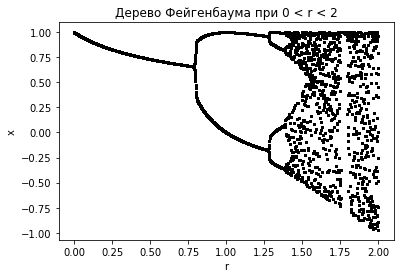

In [240]:
N = 1000
y = []
y.append(0.5)
for r in np.arange(0.0, 2.0, 0.0005):  
    for n in np.arange(1, N, 1):       
        y.append((round(1 - r * y[n-1] ** 2, 4))) 
    y = y[N-250:N]
    r = [r] * 250
    plt.plot(r, y, color='black', linestyle=' ', marker='.', markersize=1) 
plt.title("Дерево Фейгенбаума при 0 < r < 2")
plt.xlabel("r")
plt.ylabel("x")
plt.show()

Реализуем функцию расчета показателя Ляпунова $L(\vec{x}) = \lim_{n\to \infty}\frac{\sum{_{i=0}^{n-1}}\log{|{f'(x_i)}|}}{n+1}$

In [241]:
def foo(x, r=1.72):
  return 1 - r * x ** 2

In [242]:
def foo_derivative(x, r):
  return -2 * r * x

In [243]:
def Lyapunov(start, params, times):
  Lyapunov = []
  params = params
  for r in params:
    values = []
    values.append(start)
    for i in range(times - 1):
      values.append(np.log(np.abs(foo_derivative(values[i-1], r))))
    Lyapunov.append(sum(values) / (times + 1))
  
  return Lyapunov

Построим график зависимости Ляпуновского показателя

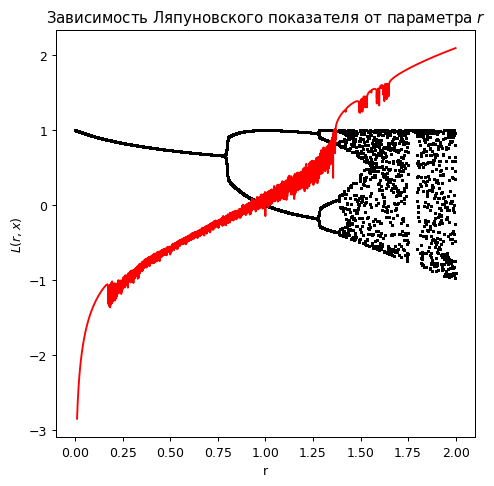

In [244]:
N = 1000
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
y = []
y.append(0.5)
for r in np.arange(0.0, 2.0, 0.0005):  
    for n in np.arange(1, N, 1):       
        y.append((round(1 - r * y[n-1] ** 2, 4))) 
    y = y[N-250:N]
    r = [r] * 250
    plt.plot(r, y, color='black', linestyle=' ', marker='.', markersize=1) 
plt.title("Дерево Фейгенбаума при 0 < r < 2")
plt.xlabel("r")
plt.ylabel("x")


x0 = 0.5
times = 200
params = np.arange(0.01, 2.0, 0.0001)
plt.title('Зависимость Ляпуновского показателя от параметра $r$')
plt.xlabel('r')
plt.ylabel('$L(r, x)$')
plt.plot(params, Lyapunov(x0, params, times), 'red');

<font size=5>***Таким образом, когда $L(r, x)<0$, то сохраняется устойчивый режим. Точка $L(r, x)=0$ - точка бифуркации. А когда $L(r, x)>0$, система переходит в хаос.*** 

Преобразование Фурье

In [245]:
def Fourier(series):
  return np.fft.rfft(series)

Устойчивый режим

In [246]:
x0 = 0.5
times = 100
r = 0.5
source_series = []
source_series.append(x0)

for i in range(times - 1):
  source_series.append(foo(source_series[-1], r))


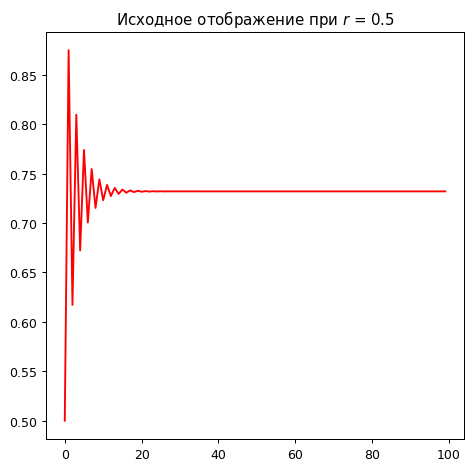

In [247]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Исходное отображение при $r$ = 0.5')
plt.plot(source_series, 'red')

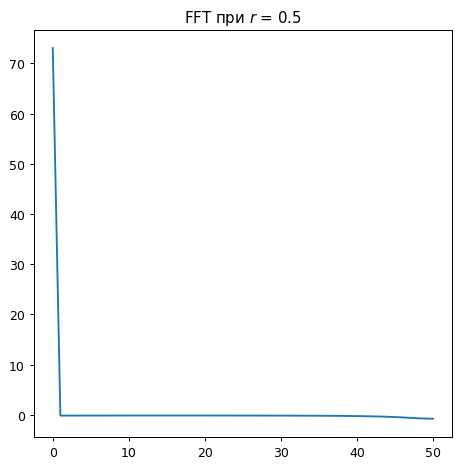

In [248]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('FFT при $r$ = 0.5')
plt.plot(Fourier(source_series));

Двукратный цикл

In [249]:
x0 = 0.5
times = 100
r = 1.15
source_series = []
source_series.append(x0)

for i in range(times - 1):
  source_series.append(foo(source_series[-1], r))

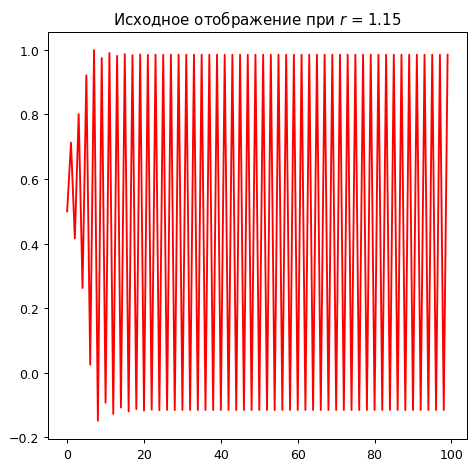

In [250]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Исходное отображение при $r$ = 1.15')
plt.plot(source_series, 'red')

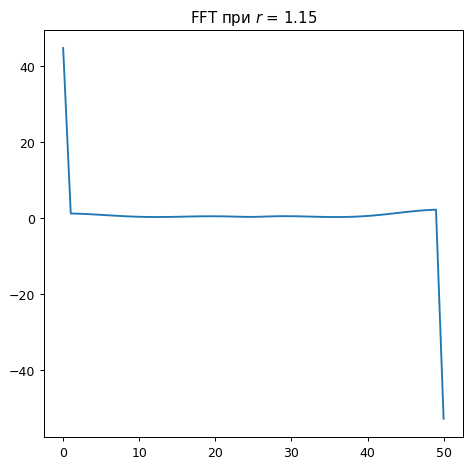

In [251]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('FFT при $r$ = 1.15')
plt.plot(Fourier(source_series));

Четырехкратный цикл

In [252]:
x0 = 0.5
times = 100
r = 1.4
source_series = []
source_series.append(x0)

for i in range(times - 1):
  source_series.append(foo(source_series[-1], r))

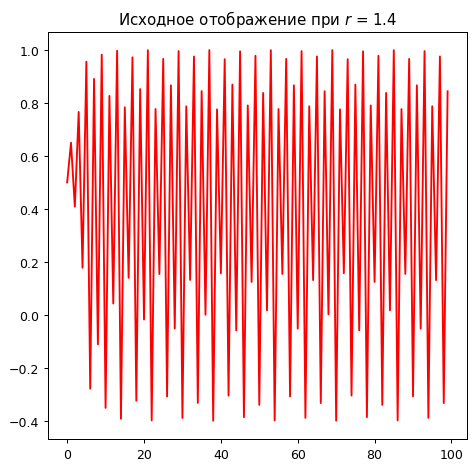

In [253]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Исходное отображение при $r$ = 1.4')
plt.plot(source_series, 'red')

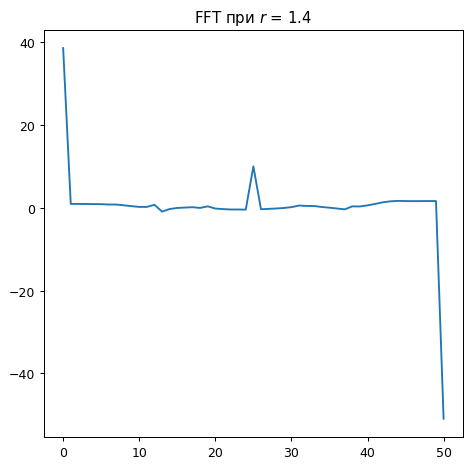

In [254]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('FFT при $r$ = 1.4')
plt.plot(Fourier(source_series));

Хаос

In [255]:
x0 = 0.5
times = 100
r = 1.99
source_series = []
source_series.append(x0)

for i in range(times - 1):
  source_series.append(foo(source_series[-1], r))

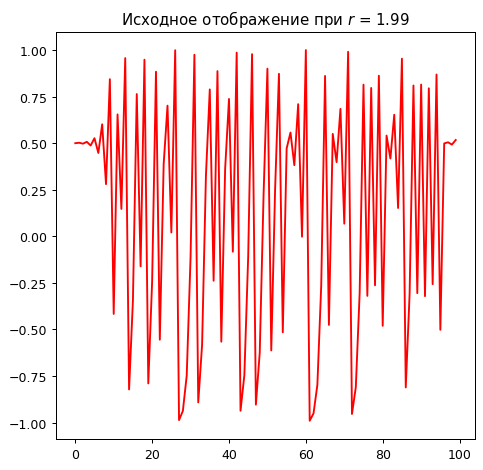

In [256]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Исходное отображение при $r$ = 1.99')
plt.plot(source_series, 'red')

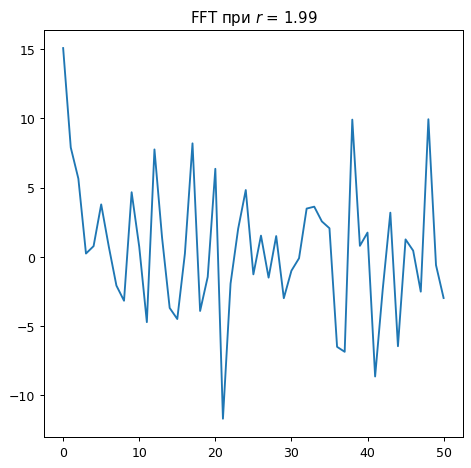

In [257]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('FFT при $r$ = 1.99')
plt.plot(Fourier(source_series));

<font size=5>***Таким образом с помощью преобразования Фурье при настройке параметра можно получить различные структурные положения отображения***

Структурная функция Колмогорова (Альтера-Джонса)

In [258]:
def colmogorov(series, tau):
  N = len(series)
  result = 0
  for i in range(1, N - tau):
    result += np.abs(foo(series[i + tau]) - foo(series[i]))
  atau = 1 / (N - tau) * result
  return atau

Инициализация параметров и ряда, **Если нужно сменить структуру, меняем r.**

In [259]:
x0 = 0.5
times = 1000
r = 1.33
source_series = []
source_series.append(x0)

for i in range(times - 1):
  source_series.append(foo(source_series[-1], r))

Тестирование функции Колмогорова

In [260]:
taus = np.arange(1, int(times/10), 1)

ataus = []
for tau in taus:
  ataus.append(colmogorov(source_series, tau))

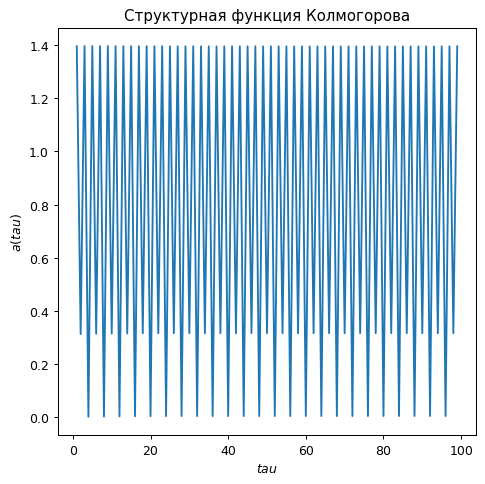

In [261]:
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Структурная функция Колмогорова')
plt.xlabel('$tau$')
plt.ylabel('$a(tau)$')
plt.plot(taus, ataus)
plt.show()

<font size=5>***Таким образом функция колмогорова показывает регулярность отображения.***